# **AssignmetThree on 02/07/2024**

## **Installing PRAW package**

In [10]:
# Install package praw which allows us to intract with Reddit API using Python
#!pip install praw  

## **Authentication**

In [11]:
import praw  # Importing praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" 
reddit = praw.Reddit(
    client_id="TjDs35RvVf7zqcgc8BrEQw", # My User ID
    client_secret="LNU5kTy-ij320beV7lLzfwqh0RlcUw", # My User client Key
    user_agent=user_agent
)

## **Importing required packages such as Pandas, Numpy, Re.**

In [12]:
import pandas as pd  # Importing Pandas as pd
import numpy as np   # Importing numpy as np
import re            # RegEx : Regular expression

## **Get Trending Topic from your Subreddit**

The **"recession"** subreddit channel will be use for this project

In [13]:
headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

A Stamford CT partially WFH employee would be paid 15% less
p2b06c
MikeMauls
1628680556.0
17
0.91
https://www.businessinsider.com/google-salary-calculator-work-from-home-pay-cut-technology-2021-8
0


 ## **Get total comment in Subreddit**

In [14]:
headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None): # Retreving the tittle of hot posts in recession subreddit.
    headlines.add(submission.title)
print(len(headlines)) # Printing the no of Unique Headlines

67


## **Creating a DataFrame.**

In [15]:
#Create a dataframe from the scrapped data 
war_df = pd.DataFrame(headlines)
war_df.head() # Printing the top Five Rows

,0
0,Analyzing the Global Financial Crisis of 2008
1,The next 45 days are the ‘most critical period...
2,U.S. economy shrank 4.8% in the face of COVID-...
3,Consumer spending declines at fastest pace sin...
4,"The economy, job growth and stock market — hav..."


In [16]:
war_df.head() # Printing the Top Five Rows

,0
0,Analyzing the Global Financial Crisis of 2008
1,The next 45 days are the ‘most critical period...
2,U.S. economy shrank 4.8% in the face of COVID-...
3,Consumer spending declines at fastest pace sin...
4,"The economy, job growth and stock market — hav..."


## **Adding Column Names**

In [17]:
war_df.columns # Printing the Column Names.

RangeIndex(start=0, stop=1, step=1)

In [18]:
war_df.columns = ['Titles'] # Adding Column Names

## **Printing Top Five Rows**

In [19]:
war_df.head() # Printing top Five Rows

,Titles
0,Analyzing the Global Financial Crisis of 2008
1,The next 45 days are the ‘most critical period...
2,U.S. economy shrank 4.8% in the face of COVID-...
3,Consumer spending declines at fastest pace sin...
4,"The economy, job growth and stock market — hav..."


## **Checking For Duplictes.**

In [20]:
war_df.Titles.duplicated().sum()   # Printing the Sum of Duplicates.

0

## **Cleaning the TExt**

In [21]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
war_df["Titles"]= war_df["Titles"].apply(cleanTxt)

#Show the clean text
war_df.head()

,Titles
0,Analyzing the Global Financial Crisis of 2008
1,The next 45 days are the ‘most critical period...
2,U.S. economy shrank 4.8% in the face of COVID-...
3,Consumer spending declines at fastest pace sin...
4,"The economy, job growth and stock market — hav..."


## **Removing Emoji and Unicode.**

In [22]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
war_df["Titles"]= war_df["Titles"].apply(remove_emoji)

#Show the clean text
war_df.head()

,Titles
0,Analyzing the Global Financial Crisis of 2008
1,The next 45 days are the ‘most critical period...
2,U.S. economy shrank 4.8% in the face of COVID-...
3,Consumer spending declines at fastest pace sin...
4,"The economy, job growth and stock market — hav..."


## **Installing Textblob**

In [23]:
#!pip install textblob

In [24]:
from textblob import TextBlob ## Importing TextBlob
from wordcloud import WordCloud, STOPWORDS  

In [25]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
war_df['Subjectivity'] = war_df['Titles'].apply(getSubjectivity)
war_df['Polarity'] = war_df['Titles'].apply(getPolarity)

#Now display data
war_df.head()

,Titles,Subjectivity,Polarity
0,Analyzing the Global Financial Crisis of 2008,0.000,0.000
1,The next 45 days are the ‘most critical period...,0.325,0.125
2,U.S. economy shrank 4.8% in the face of COVID-...,0.875,-0.100
3,Consumer spending declines at fastest pace sin...,0.600,-0.100
4,"The economy, job growth and stock market — hav...",0.000,0.000


## **Grouping The Range**

In [26]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
war_df["Insight"] = war_df["Polarity"].apply(getInsight)

war_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Analyzing the Global Financial Crisis of 2008,0.000000,0.000000,Neutral
1,The next 45 days are the ‘most critical period...,0.325000,0.125000,Positive
2,U.S. economy shrank 4.8% in the face of COVID-...,0.875000,-0.100000,Negative
3,Consumer spending declines at fastest pace sin...,0.600000,-0.100000,Negative
4,"The economy, job growth and stock market — hav...",0.000000,0.000000,Neutral
5,The economy is in free fall but Wall Street is...,0.443750,0.162500,Positive
6,2020 Recession Preparing For The Next Financia...,0.000000,0.000000,Neutral
7,2020 Predictions for the United States Economy,0.000000,0.000000,Neutral
8,The Wisdom Collector The covid-19 recession in...,1.000000,-1.000000,Negative
9,THE world's biggest economies may plunge into ...,0.000000,0.000000,Neutral


## **Data Visualization**

In [27]:
import seaborn as sns # Importing seaborn Package
import warnings 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.style.use('fivethirtyeight')

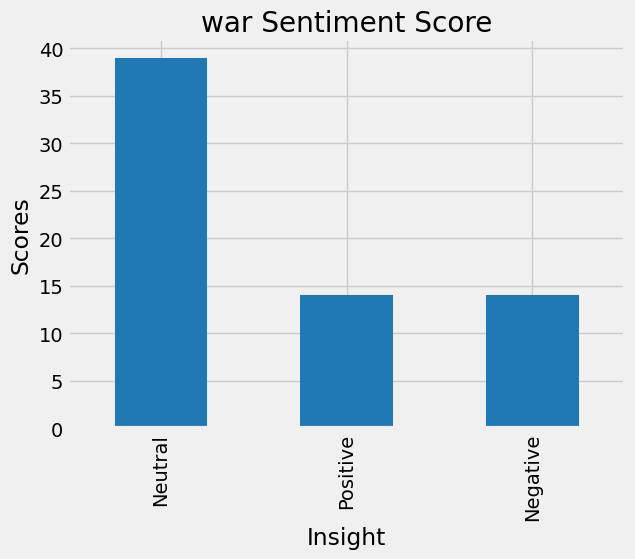

In [28]:
#Plot the values count of sentiment
plt.title("war Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (10,8) # Figure Size
war_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## **Creating New Wordcloud**

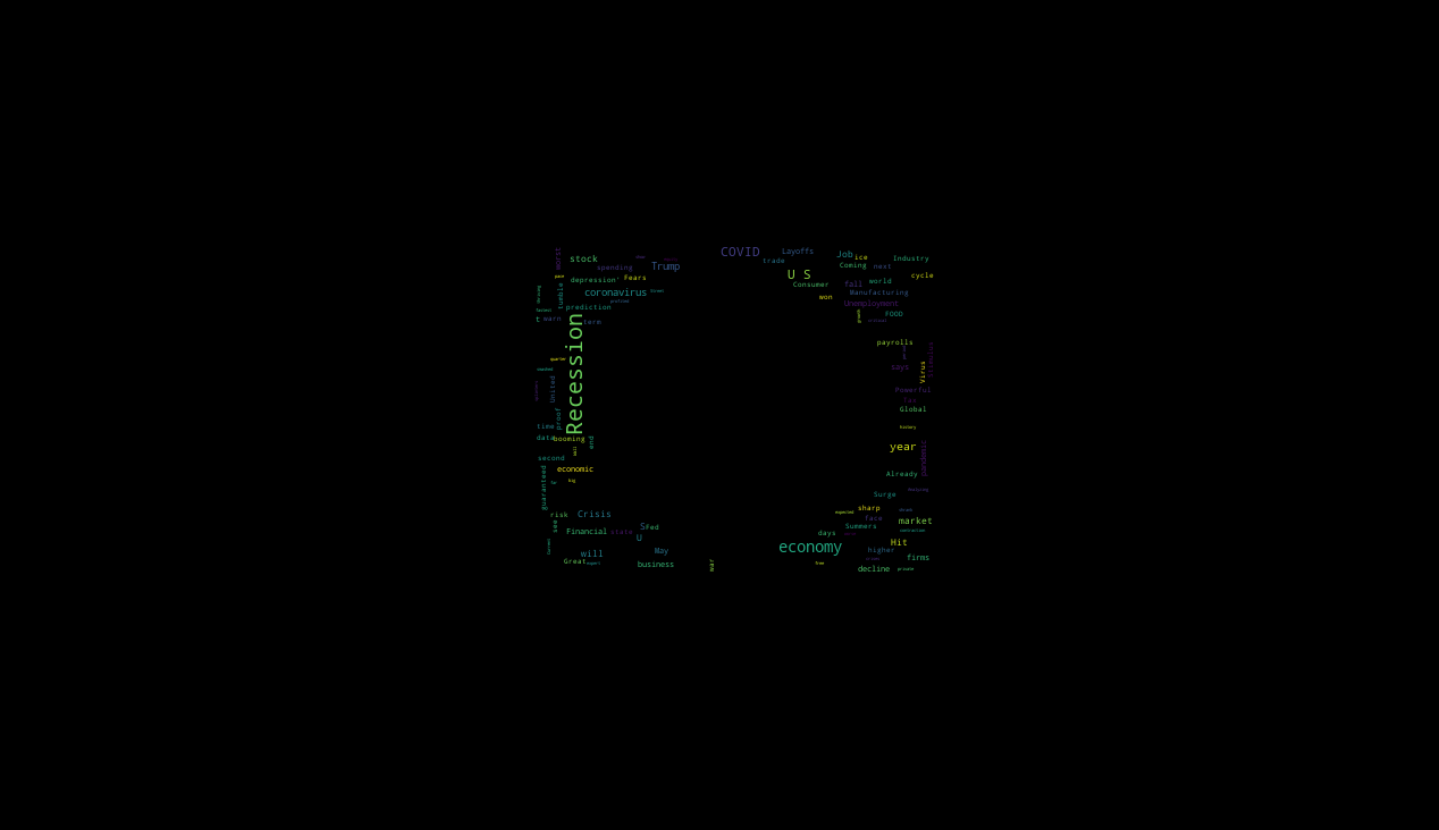

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the mask image
mask = np.array(Image.open("srimanth.png"))

# Join all tweet titles into a single string
text = ' '.join([twts for twts in war_df['Titles']])

# Generate word cloud with the specified mask
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="black",
                      mask=mask).generate(text)

# Display the generated image
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud

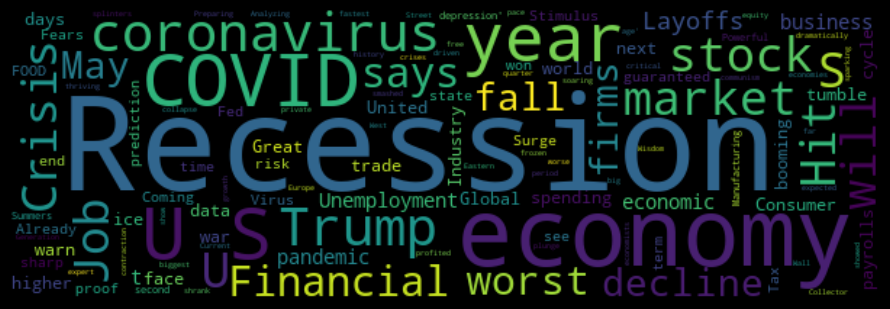

In [35]:
text = ' '.join( [twts for twts in war_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=600, height = 200, ## height and Width of the word cloud
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");